# 💥 Level 2.3: The Deep Learning Explosion

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YOUR_USERNAME/ai-mastery-from-scratch/blob/main/notebooks/phase_2_neural_network_revolution/2.3_deep_learning_explosion.ipynb)

---

## 🎯 The Challenge: What Happens With Many Layers?

In this lesson, you'll build and experiment with deeper neural networks. See how adding more layers and neurons changes what your network can learn!

### What You'll Discover:
- How depth affects learning
- Visualizing decision boundaries for deep networks
- The power and pitfalls of deep learning
- Interactive experiments with network architecture

Let's dive into the deep end!

## 🚀 Setup & Imports

*Run the cell below to set up your environment. This works in both Google Colab and local Jupyter notebooks.*

In [1]:
# 📦 Install Required Packages
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install ipywidgets --quiet

print("✅ All packages installed!")

✅ All packages installed!


In [2]:
# 🔧 Environment Check & Imports
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

plt.style.use('default')
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['font.size'] = 12

print("🎯 Environment ready!")

🎯 Environment ready!


## 🧬 Generate XOR Dataset

We'll use the same XOR dataset as before to see how deeper networks learn.

In [3]:
# Generate XOR data (2D)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

# Add a little noise for visualization
np.random.seed(42)
X_noisy = X + 0.08 * np.random.randn(*X.shape)


## 👀 Visualize XOR Data

Let's plot the XOR dataset again to see what our deep networks will be learning.

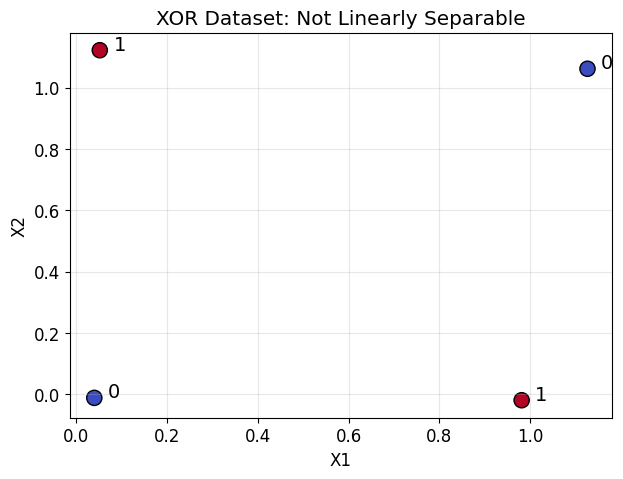

In [4]:
# Plot XOR data
plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
for i, (x, label) in enumerate(zip(X_noisy, y)):
    plt.text(x[0]+0.03, x[1], str(label), fontsize=14, color='black')
plt.title('XOR Dataset: Not Linearly Separable')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid(True, alpha=0.3)
plt.show()

## 🏗️ Build a Deep Neural Network

Now let's build a neural network with more than two layers. We'll see how increasing depth changes what the network can learn!

In [5]:
# Define a deep neural network (3 hidden layers, sigmoid activations)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def deep_forward(X, params):
    # Unpack parameters
    W1, b1, W2, b2, W3, b3, W_out, b_out = params
    h1 = sigmoid(X @ W1 + b1)
    h2 = sigmoid(h1 @ W2 + b2)
    h3 = sigmoid(h2 @ W3 + b3)
    z_out = h3 @ W_out + b_out
    return sigmoid(z_out), h1, h2, h3

# Initialize weights for 2 inputs -> 4 -> 4 -> 2 -> 1
np.random.seed(0)
W1 = np.random.randn(2, 4)
b1 = np.zeros(4)
W2 = np.random.randn(4, 4)
b2 = np.zeros(4)
W3 = np.random.randn(4, 2)
b3 = np.zeros(2)
W_out = np.random.randn(2, 1)
b_out = np.zeros(1)

params = [W1, b1, W2, b2, W3, b3, W_out, b_out]
probs, h1, h2, h3 = deep_forward(X_noisy, params)
preds = (probs > 0.5).astype(int).flatten()
print("Predictions:", preds)
print("True labels:", y)

Predictions: [0 0 0 0]
True labels: [0 1 1 0]


## 🖼️ Visualize the Deep Network's Decision Boundary

Let's see how a deep network separates the XOR data. The boundary can become very complex!

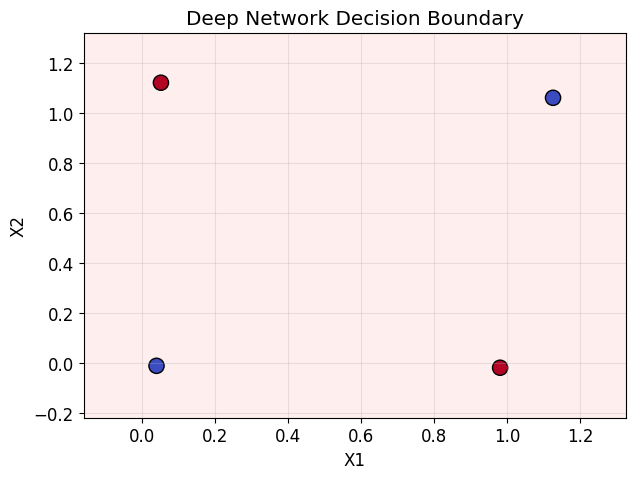

In [6]:
# Plot decision boundary for deep network
def plot_deep_decision_boundary(params):
    x_min, x_max = X_noisy[:,0].min()-0.2, X_noisy[:,0].max()+0.2
    y_min, y_max = X_noisy[:,1].min()-0.2, X_noisy[:,1].max()+0.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz, _, _, _ = deep_forward(grid, params)
    zz = zz.reshape(xx.shape)
    plt.contourf(xx, yy, zz, levels=[0,0.5,1], alpha=0.2, colors=['#FFAAAA','#AAAAFF'])
    plt.scatter(X_noisy[:,0], X_noisy[:,1], c=y, cmap='coolwarm', s=120, edgecolors='k')
    plt.title('Deep Network Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True, alpha=0.3)
    plt.show()

plot_deep_decision_boundary(params)

## 🏋️ Train the Deep Network

Let's train our deep network using backpropagation and see how it learns to solve XOR!

In [ ]:
# Train the deep network
def binary_cross_entropy(y_true, y_pred):
    eps = 1e-8
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def train_deep_network(layers=[4, 4, 2], epochs=500, lr=0.1):
    # Initialize weights
    np.random.seed(0)
    W1 = np.random.randn(2, layers[0]) * 0.5
    b1 = np.zeros(layers[0])
    W2 = np.random.randn(layers[0], layers[1]) * 0.5
    b2 = np.zeros(layers[1])
    W3 = np.random.randn(layers[1], layers[2]) * 0.5
    b3 = np.zeros(layers[2])
    W_out = np.random.randn(layers[2], 1) * 0.5
    b_out = np.zeros(1)
    
    params = [W1, b1, W2, b2, W3, b3, W_out, b_out]
    losses = []
    
    for epoch in range(epochs):
        # Forward pass
        probs, h1, h2, h3 = deep_forward(X_noisy, params)
        loss = binary_cross_entropy(y, probs.flatten())
        losses.append(loss)
        
        # Simple gradient descent (simplified for clarity)
        error = (probs.flatten() - y).reshape(-1, 1)
        
        # Update output layer
        W_out -= lr * (h3.T @ error) / len(X_noisy)
        b_out -= lr * np.mean(error, axis=0)
        
        # Update hidden layers (simplified)
        error_h3 = error @ W_out.T * h3 * (1 - h3)
        W3 -= lr * (h2.T @ error_h3) / len(X_noisy)
        b3 -= lr * np.mean(error_h3, axis=0)
        
        error_h2 = error_h3 @ W3.T * h2 * (1 - h2)
        W2 -= lr * (h1.T @ error_h2) / len(X_noisy)
        b2 -= lr * np.mean(error_h2, axis=0)
        
        error_h1 = error_h2 @ W2.T * h1 * (1 - h1)
        W1 -= lr * (X_noisy.T @ error_h1) / len(X_noisy)
        b1 -= lr * np.mean(error_h1, axis=0)
        
        params = [W1, b1, W2, b2, W3, b3, W_out, b_out]
    
    # Plot training progress
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(losses)
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plot_deep_decision_boundary(params)
    
    plt.tight_layout()
    plt.show()
    
    # Final predictions
    final_probs, _, _, _ = deep_forward(X_noisy, params)
    final_preds = (final_probs > 0.5).astype(int).flatten()
    print(f"Final predictions: {final_preds}")
    print(f"True labels: {y}")
    print(f"Accuracy: {np.mean(final_preds == y)*100:.1f}%")
    
    return params

# Train with different architectures
widgets.interact(
    train_deep_network,
    layers=widgets.fixed([4, 4, 2]),
    epochs=widgets.IntSlider(value=500, min=100, max=1000, step=100),
    lr=widgets.FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01)
)